In [1]:
import category_encoders
import matplotlib.pyplot as plt
import pandas as pd
import pycaret.regression as regression
import sklearn.preprocessing

In [2]:
train_df = pd.read_csv("train.csv")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
pd.DataFrame(train_df.dtypes).values

array([[dtype('int64')],
       [dtype('int64')],
       [dtype('O')],
       [dtype('float64')],
       [dtype('int64')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('int64')],
       [dtype('int64')],
       [dtype('int64')],
       [dtype('int64')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('float64')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('int64')],
       [dtype('O')],
       [dtype('int64')],
       [dtype('int64')],
       [dtype('int64')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('O')],
       [dtype('int64')],
       [dtype('i

In [5]:
int64_columns = train_df.select_dtypes(include='int64').columns.tolist()
int64_columns

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [6]:
object_columns = train_df.select_dtypes(include='object').columns.tolist()
object_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [7]:
float64_columns = train_df.select_dtypes(include='float64').columns.tolist()
float64_columns

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [8]:
len(int64_columns)

35

In [9]:
len(object_columns)

43

In [10]:
len(float64_columns)

3

In [11]:
scale_columns = int64_columns + float64_columns
scale_columns.remove("Id")
scale_columns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

In [12]:
scaler = sklearn.preprocessing.StandardScaler()
scaled_df = train_df.copy()
scaled_df[scale_columns] = scaler.fit_transform(train_df[scale_columns])
scaled_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0.073375,RL,-0.208034,-0.207142,Pave,NaN,Reg,Lvl,AllPub,...,-0.068692,NaN,NaN,NaN,-0.087688,-1.599111,0.138777,WD,Normal,0.347273
1,2,-0.872563,RL,0.409895,-0.091886,Pave,NaN,Reg,Lvl,AllPub,...,-0.068692,NaN,NaN,NaN,-0.087688,-0.489110,-0.614439,WD,Normal,0.007288
2,3,0.073375,RL,-0.084449,0.073480,Pave,NaN,IR1,Lvl,AllPub,...,-0.068692,NaN,NaN,NaN,-0.087688,0.990891,0.138777,WD,Normal,0.536154
3,4,0.309859,RL,-0.414011,-0.096897,Pave,NaN,IR1,Lvl,AllPub,...,-0.068692,NaN,NaN,NaN,-0.087688,-1.599111,-1.367655,WD,Abnorml,-0.515281
4,5,0.073375,RL,0.574676,0.375148,Pave,NaN,IR1,Lvl,AllPub,...,-0.068692,NaN,NaN,NaN,-0.087688,2.100892,0.138777,WD,Normal,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.073375,RL,-0.331620,-0.260560,Pave,NaN,Reg,Lvl,AllPub,...,-0.068692,NaN,NaN,NaN,-0.087688,0.620891,-0.614439,WD,Normal,-0.074560
1456,1457,-0.872563,RL,0.615871,0.266407,Pave,NaN,Reg,Lvl,AllPub,...,-0.068692,NaN,MnPrv,NaN,-0.087688,-1.599111,1.645210,WD,Normal,0.366161
1457,1458,0.309859,RL,-0.166839,-0.147810,Pave,NaN,Reg,Lvl,AllPub,...,-0.068692,NaN,GdPrv,Shed,4.953112,-0.489110,1.645210,WD,Normal,1.077611
1458,1459,-0.872563,RL,-0.084449,-0.080160,Pave,NaN,Reg,Lvl,AllPub,...,-0.068692,NaN,NaN,NaN,-0.087688,-0.859110,1.645210,WD,Normal,-0.488523


In [13]:
encoder = category_encoders.ordinal.OrdinalEncoder()
encoded_df = encoder.fit_transform(scaled_df)
encoded_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0.073375,1,-0.208034,-0.207142,1,3,1,1,1,...,-0.068692,4,5,5,-0.087688,-1.599111,0.138777,1,1,0.347273
1,2,-0.872563,1,0.409895,-0.091886,1,3,1,1,1,...,-0.068692,4,5,5,-0.087688,-0.489110,-0.614439,1,1,0.007288
2,3,0.073375,1,-0.084449,0.073480,1,3,2,1,1,...,-0.068692,4,5,5,-0.087688,0.990891,0.138777,1,1,0.536154
3,4,0.309859,1,-0.414011,-0.096897,1,3,2,1,1,...,-0.068692,4,5,5,-0.087688,-1.599111,-1.367655,1,2,-0.515281
4,5,0.073375,1,0.574676,0.375148,1,3,2,1,1,...,-0.068692,4,5,5,-0.087688,2.100892,0.138777,1,1,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.073375,1,-0.331620,-0.260560,1,3,1,1,1,...,-0.068692,4,5,5,-0.087688,0.620891,-0.614439,1,1,-0.074560
1456,1457,-0.872563,1,0.615871,0.266407,1,3,1,1,1,...,-0.068692,4,1,5,-0.087688,-1.599111,1.645210,1,1,0.366161
1457,1458,0.309859,1,-0.166839,-0.147810,1,3,1,1,1,...,-0.068692,4,3,1,4.953112,-0.489110,1.645210,1,1,1.077611
1458,1459,-0.872563,1,-0.084449,-0.080160,1,3,1,1,1,...,-0.068692,4,5,5,-0.087688,-0.859110,1.645210,1,1,-0.488523


In [14]:
regression.setup(encoded_df, target="SalePrice")

,Description,Value
0,Session id,8850
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 81)"
4,Transformed data shape,"(1460, 81)"
5,Transformed train set shape,"(1021, 81)"
6,Transformed test set shape,"(439, 81)"
7,Numeric features,80
8,Rows with missing values,23.2%
9,Preprocess,True


In [15]:
regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2067,0.1275,0.3378,0.8725,0.1566,1.5666,0.0650
lightgbm,Light Gradient Boosting Machine,0.2136,0.1300,0.3488,0.8717,0.1600,1.4609,0.0930
et,Extra Trees Regressor,0.2155,0.1321,0.3531,0.8678,0.1603,1.3796,0.1410
rf,Random Forest Regressor,0.2220,0.1382,0.3627,0.8588,0.1657,1.5290,0.1840
ada,AdaBoost Regressor,0.2954,0.2054,0.4427,0.7916,0.2036,2.2485,0.0410
huber,Huber Regressor,0.2657,0.2216,0.4278,0.7905,0.1844,2.0038,0.0270
br,Bayesian Ridge,0.2665,0.2595,0.4624,0.7591,0.1887,4.2879,0.0090
omp,Orthogonal Matching Pursuit,0.3171,0.2597,0.4868,0.7471,0.2058,1.5499,0.0090
ridge,Ridge Regression,0.2741,0.2829,0.4876,0.7324,0.1982,4.8097,0.0080
dt,Decision Tree Regressor,0.3636,0.3544,0.5797,0.6378,0.2439,2.1497,0.0110


GradientBoostingRegressor(random_state=8850)

In [23]:
gbr_model = regression.create_model("gbr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2212,0.1147,0.3386,0.8176,0.1618,2.4707
1,0.1849,0.0656,0.2562,0.9298,0.1286,0.9115
2,0.2564,0.4438,0.6662,0.6375,0.2197,1.2210
3,0.1851,0.0777,0.2788,0.9412,0.1401,0.8062
4,0.1841,0.0653,0.2556,0.9034,0.1473,0.6418
5,0.2053,0.1038,0.3222,0.8894,0.1599,2.9939
6,0.1867,0.0638,0.2526,0.9089,0.1472,2.1082
7,0.2017,0.0962,0.3102,0.9326,0.1348,3.4333
8,0.2192,0.1249,0.3534,0.8859,0.1639,0.4051


In [24]:
tuned_model = regression.tune_model(gbr_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2086,0.0992,0.3150,0.8421,0.1617,1.5948
1,0.1961,0.0755,0.2747,0.9193,0.1394,1.2418
2,0.2636,0.4080,0.6388,0.6668,0.2144,1.2476
3,0.2288,0.1054,0.3246,0.9203,0.1672,1.4896
4,0.1814,0.0630,0.2511,0.9068,0.1439,0.6165
5,0.2028,0.1186,0.3444,0.8736,0.1660,2.7587
6,0.2109,0.0839,0.2897,0.8801,0.1551,1.2542
7,0.2159,0.1536,0.3919,0.8924,0.1407,2.6824
8,0.2188,0.1272,0.3566,0.8839,0.1690,0.4403


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


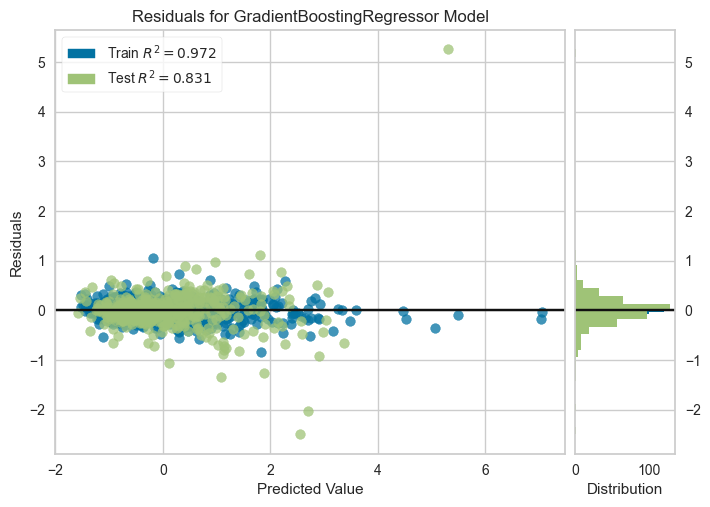

In [25]:
regression.plot_model(gbr_model)

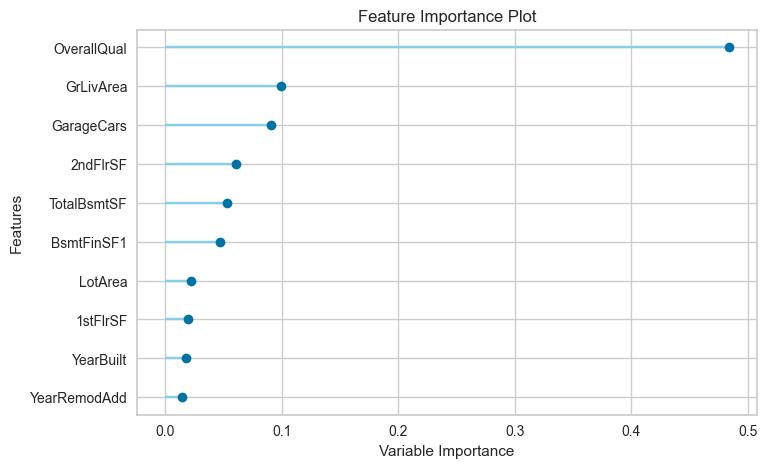

In [26]:
regression.plot_model(gbr_model, plot="feature")

In [27]:
final_model = regression.finalize_model(gbr_model)

In [21]:
test_df = pd.read_csv("test.csv")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [50]:
test_df["SalePrice"] = 0
scaled_test_df = test_df.copy()
scaled_test_df[scale_columns] = scaler.transform(test_df[scale_columns])
scaled_test_df = scaled_test_df.drop(columns=["SalePrice"])
scaled_test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,-0.872563,RH,0.409895,0.110763,Pave,NaN,Reg,Lvl,AllPub,...,1.882709,-0.068692,NaN,MnPrv,NaN,-0.087688,-0.119110,1.645210,WD,Normal
1,1462,-0.872563,RL,0.451090,0.375850,Pave,NaN,IR1,Lvl,AllPub,...,-0.270208,-0.068692,NaN,NaN,Gar2,25.116309,-0.119110,1.645210,WD,Normal
2,1463,0.073375,RL,0.162723,0.332053,Pave,NaN,IR1,Lvl,AllPub,...,-0.270208,-0.068692,NaN,MnPrv,NaN,-0.087688,-1.229111,1.645210,WD,Normal
3,1464,0.073375,RL,0.327504,-0.054002,Pave,NaN,IR1,Lvl,AllPub,...,-0.270208,-0.068692,NaN,NaN,NaN,-0.087688,-0.119110,1.645210,WD,Normal
4,1465,1.492282,RL,-1.114330,-0.552407,Pave,NaN,IR1,HLS,AllPub,...,2.313293,-0.068692,NaN,NaN,NaN,-0.087688,-1.969111,1.645210,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,2.438219,RM,-2.020626,-0.859988,Pave,NaN,Reg,Lvl,AllPub,...,-0.270208,-0.068692,NaN,NaN,NaN,-0.087688,-0.119110,-1.367655,WD,Normal
1455,2916,2.438219,RM,-2.020626,-0.864197,Pave,NaN,Reg,Lvl,AllPub,...,-0.270208,-0.068692,NaN,NaN,NaN,-0.087688,-0.859110,-1.367655,WD,Abnorml
1456,2917,-0.872563,RL,3.705515,0.950423,Pave,NaN,Reg,Lvl,AllPub,...,-0.270208,-0.068692,NaN,NaN,NaN,-0.087688,0.990891,-1.367655,WD,Abnorml
1457,2918,0.664586,RL,-0.331620,-0.007600,Pave,NaN,Reg,Lvl,AllPub,...,-0.270208,-0.068692,NaN,MnPrv,Shed,1.323736,0.250891,-1.367655,WD,Normal


In [59]:
encoded_test_df = encoder.fit_transform(scaled_test_df)
encoded_test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,-0.872563,1,0.409895,0.110763,1,3,1,1,1,...,1.882709,-0.068692,3,1,4,-0.087688,-0.119110,1.645210,1,1
1,1462,-0.872563,2,0.451090,0.375850,1,3,2,1,1,...,-0.270208,-0.068692,3,5,1,25.116309,-0.119110,1.645210,1,1
2,1463,0.073375,2,0.162723,0.332053,1,3,2,1,1,...,-0.270208,-0.068692,3,1,4,-0.087688,-1.229111,1.645210,1,1
3,1464,0.073375,2,0.327504,-0.054002,1,3,2,1,1,...,-0.270208,-0.068692,3,5,4,-0.087688,-0.119110,1.645210,1,1
4,1465,1.492282,2,-1.114330,-0.552407,1,3,2,2,1,...,2.313293,-0.068692,3,5,4,-0.087688,-1.969111,1.645210,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,2.438219,3,-2.020626,-0.859988,1,3,1,1,1,...,-0.270208,-0.068692,3,5,4,-0.087688,-0.119110,-1.367655,1,1
1455,2916,2.438219,3,-2.020626,-0.864197,1,3,1,1,1,...,-0.270208,-0.068692,3,5,4,-0.087688,-0.859110,-1.367655,1,3
1456,2917,-0.872563,2,3.705515,0.950423,1,3,1,1,1,...,-0.270208,-0.068692,3,5,4,-0.087688,0.990891,-1.367655,1,3
1457,2918,0.664586,2,-0.331620,-0.007600,1,3,1,1,1,...,-0.270208,-0.068692,3,1,2,1.323736,0.250891,-1.367655,1,1


In [60]:
predicted_df = regression.predict_model(gbr_model, encoded_test_df)
predicted_df = predicted_df.rename(columns={"prediction_label":"SalePrice"})
predicted_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,-0.872563,1,0.409895,0.110763,1,3,1,1,1,...,-0.068692,3,1,4,-0.087688,-0.119110,1.645210,1,1,-0.650845
1,1462,-0.872563,2,0.451090,0.375850,1,3,2,1,1,...,-0.068692,3,5,1,25.116308,-0.119110,1.645210,1,1,-0.336060
2,1463,0.073375,2,0.162723,0.332053,1,3,2,1,1,...,-0.068692,3,1,4,-0.087688,-1.229111,1.645210,1,1,-0.069667
3,1464,0.073375,2,0.327504,-0.054002,1,3,2,1,1,...,-0.068692,3,5,4,-0.087688,-0.119110,1.645210,1,1,-0.078078
4,1465,1.492282,2,-1.114330,-0.552407,1,3,2,2,1,...,-0.068692,3,5,4,-0.087688,-1.969111,1.645210,1,1,0.137951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,2.438219,3,-2.020626,-0.859988,1,3,1,1,1,...,-0.068692,3,5,4,-0.087688,-0.119110,-1.367655,1,1,-1.220846
1455,2916,2.438219,3,-2.020626,-0.864197,1,3,1,1,1,...,-0.068692,3,5,4,-0.087688,-0.859110,-1.367655,1,3,-1.257178
1456,2917,-0.872563,2,3.705515,0.950423,1,3,1,1,1,...,-0.068692,3,5,4,-0.087688,0.990891,-1.367655,1,3,0.191471
1457,2918,0.664586,2,-0.331620,-0.007600,1,3,1,1,1,...,-0.068692,3,1,2,1.323736,0.250891,-1.367655,1,1,-0.863195


In [61]:
inversed_df = pd.DataFrame(scaler.inverse_transform(predicted_df[scale_columns]))
inversed_df.columns = scale_columns
inversed_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt
0,20.000000,11621.999998,5.0,6.0,1961.000000,1960.999999,467.999999,1.440000e+02,269.999993,882.000003,...,-7.337726e-08,1.200000e+02,8.586076e-08,-6.089672e-07,6.0,2010.0,129234.169599,80.000000,0.000005,1961.000001
1,20.000000,14266.999975,6.0,6.0,1958.000000,1958.000001,923.000022,-9.940658e-07,405.999994,1328.999992,...,-7.337726e-08,-2.543388e-07,8.586076e-08,1.250000e+04,6.0,2010.0,154232.926945,81.000000,108.000000,1957.999999
2,60.000000,13830.000088,5.0,5.0,1997.000001,1997.999999,790.999988,-9.940658e-07,136.999996,927.999999,...,-7.337726e-08,-2.543388e-07,8.586076e-08,-6.089672e-07,3.0,2010.0,175388.599092,74.000000,0.000005,1997.000000
3,60.000000,9977.999995,6.0,6.0,1997.999999,1997.999999,602.000005,-9.940658e-07,323.999998,925.999994,...,-7.337726e-08,-2.543388e-07,8.586076e-08,-6.089672e-07,6.0,2010.0,174720.621866,78.000000,19.999998,1998.000000
4,120.000001,5004.999949,8.0,5.0,1992.000000,1992.000000,263.000001,-9.940658e-07,1016.999997,1280.000009,...,-7.337726e-08,1.440000e+02,8.586076e-08,-6.089672e-07,1.0,2010.0,191876.592037,43.000001,0.000005,1992.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.000002,1935.999829,4.0,7.0,1970.000000,1970.000000,0.000006,-9.940658e-07,545.999999,546.000014,...,-7.337726e-08,-2.543388e-07,8.586076e-08,-6.089672e-07,6.0,2006.0,83967.362658,21.000001,0.000005,NaN
1455,160.000002,1894.000280,4.0,5.0,1970.000000,1970.000000,252.000005,-9.940658e-07,294.000004,546.000014,...,-7.337726e-08,-2.543388e-07,8.586076e-08,-6.089672e-07,4.0,2006.0,81082.008769,21.000001,0.000005,1970.000000
1456,20.000000,20000.000155,5.0,7.0,1960.000000,1996.000000,1224.000014,-9.940658e-07,-0.000006,1224.000005,...,-7.337726e-08,-2.543388e-07,8.586076e-08,-6.089672e-07,9.0,2006.0,196126.921999,160.000003,0.000005,1960.000000
1457,85.000001,10441.000000,5.0,5.0,1992.000000,1992.000000,337.000001,-9.940658e-07,575.000000,912.000003,...,-7.337726e-08,-2.543388e-07,8.586076e-08,7.000000e+02,7.0,2006.0,112370.313279,62.000000,0.000005,NaN


In [64]:
submit_df = test_df[["Id"]].join(inversed_df[["SalePrice"]])
submit_df

,Id,SalePrice
0,1461,129234.169599
1,1462,154232.926945
2,1463,175388.599092
3,1464,174720.621866
4,1465,191876.592037
...,...,...
1454,2915,83967.362658
1455,2916,81082.008769
1456,2917,196126.921999
1457,2918,112370.313279


In [67]:
submit_df.to_csv("submit.csv", index=False)